In [1]:
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

In [4]:
import numpy as np

In [5]:
df=pd.read_csv('pokemons.csv')

In [6]:
# Display first 5 observations
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


#### BOXPLOT : Les boîtes à moustache
Elle décrit les informations suivantes: 
la plus petite observation (échantillon minimum), le quartile 1 (25%), la médiane (50%), le quartile 3 (75%) et la plus grande observation (échantillon maximum). La boîte à moustaches indique également les valeurs atypiques éventuelles. Elle est construite de bas en haut, du quartile inférieur au quartile supérieur. 
Les moustaches connectent la boîte aux plus petites et aux plus grandes valeurs qui ne sont pas des valeurs atypiques éventuelles.

<AxesSubplot:>

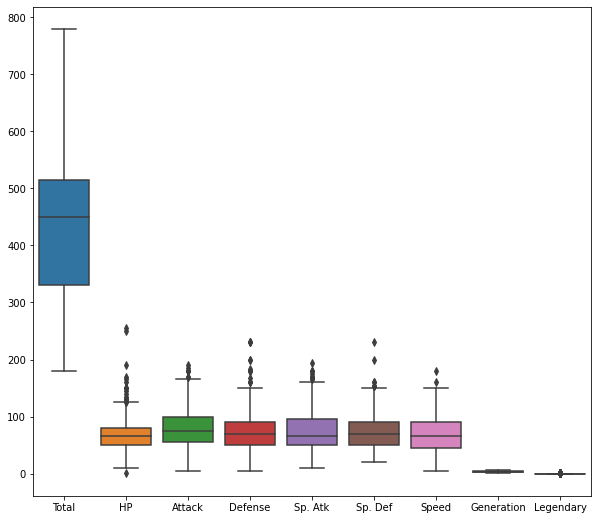

In [7]:
# Méthode .figure pour définir de la taille du graphique
plt.figure(figsize=[10,9])
# Méthode .boxplot
sns.boxplot(data=df)

<AxesSubplot:>

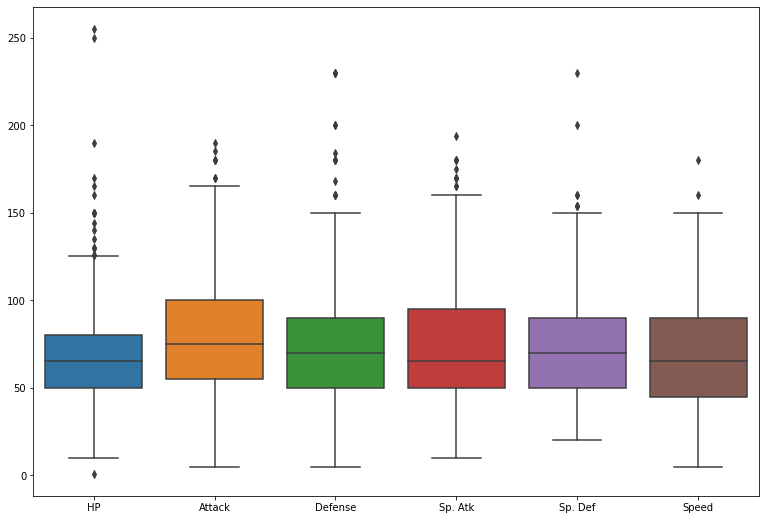

In [8]:
plt.figure(figsize=[13,9])
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Generation', 'Legendary'], axis=1)
 
# New boxplot using stats_df
sns.boxplot(data=stats_df)

#### Violin
Les violin plots sont similaires au boxplots. L’avantage de ces derniers par rapport aux boxplots est qu’ils nous permette de visualiser la distribution des données et et leur densité de probabilité. On peut interpreter le violin plot comme la combinaison parfaite des boxplots et des density plots.

Ce type de graphique nous permet de savoir si les données sont unimodale, bimodale ou même multi-modale. Ces détails pourtant simples sont invisible dans un boxplot. Dans un violin plot la distribution peut être vue sur la largeur.

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

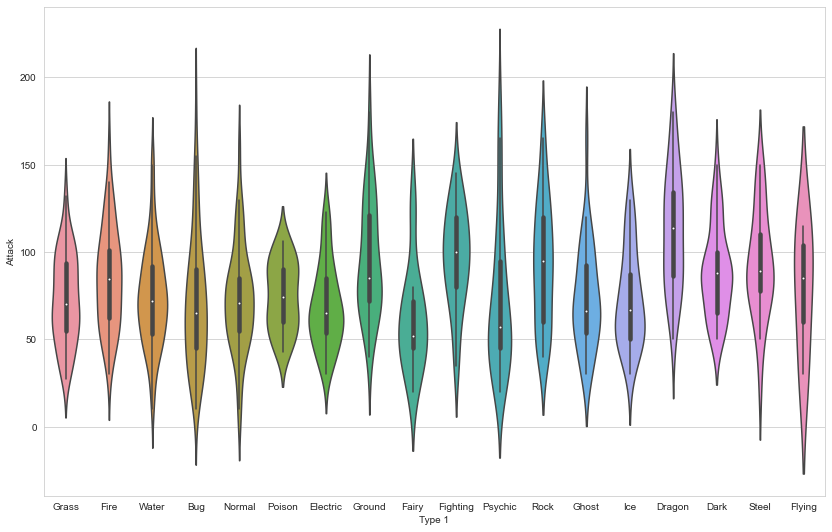

In [9]:
plt.figure(figsize=[14,9])

# Set theme
sns.set_style('whitegrid')
 
# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=df)

In [10]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

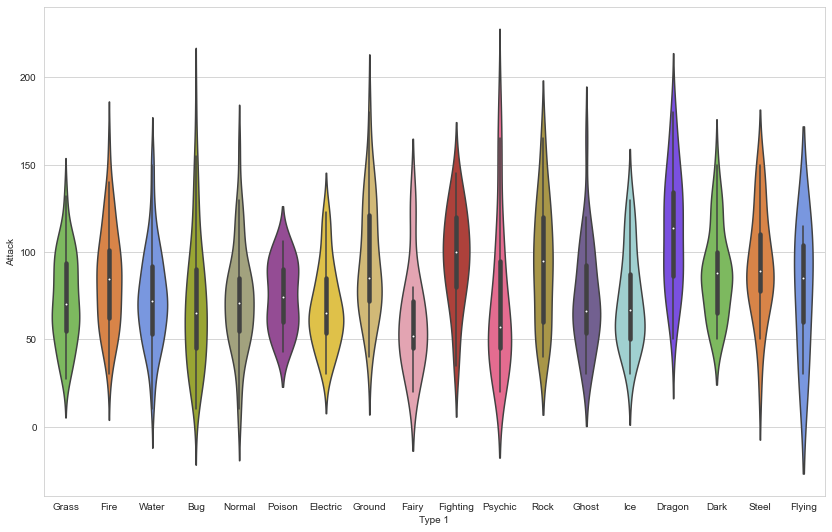

In [11]:
plt.figure(figsize=[14,9])
# Violin plot with Pokemon color palette
sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors) # Set color palette

In [12]:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45
1,Ivysaur,Grass,Poison,60,62,63,80,80,60
2,Venusaur,Grass,Poison,80,82,83,100,100,80
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80
4,Charmander,Fire,NaN,39,52,43,60,50,65


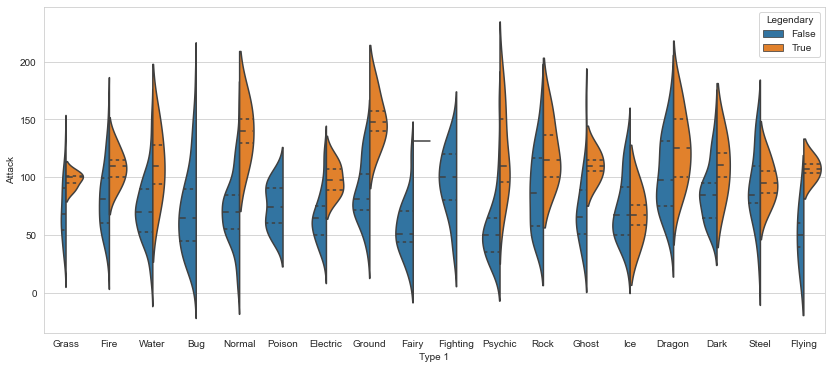

In [13]:
ax = sns.violinplot(x="Type 1", y="Attack", data=df, hue="Legendary", split=True, inner='quart')
ax.figure.set_size_inches((14, 6))

In [14]:
# Melt DataFrame
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,VenusaurMega Venusaur,Grass,Poison,HP,80
4,Charmander,Fire,NaN,HP,39


c:\users\utilisateur\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 81.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\utilisateur\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 76.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\utilisateur\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 77.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\utilisateur\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 77.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot

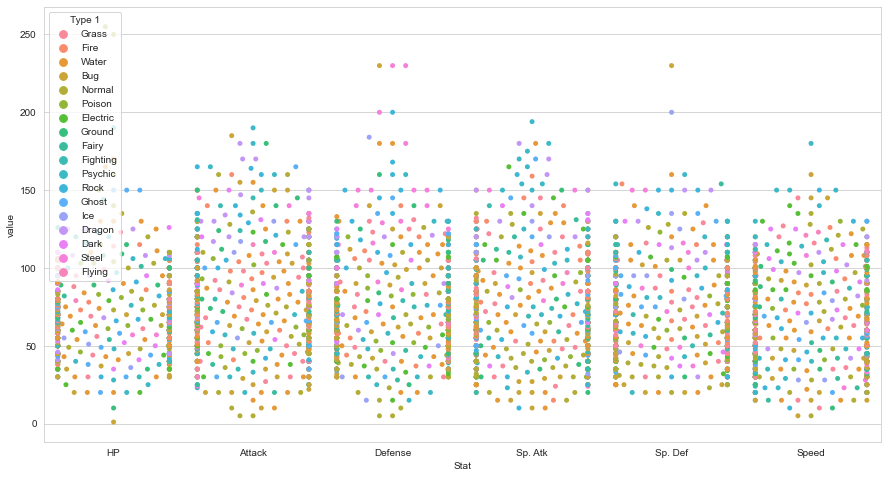

In [15]:
# Swarmplot with melted_df
ax = sns.swarmplot(x='Stat', y='value', data=melted_df, 
              hue='Type 1')
ax.figure.set_size_inches((15, 8))

<AxesSubplot:xlabel='Defense', ylabel='Attack'>

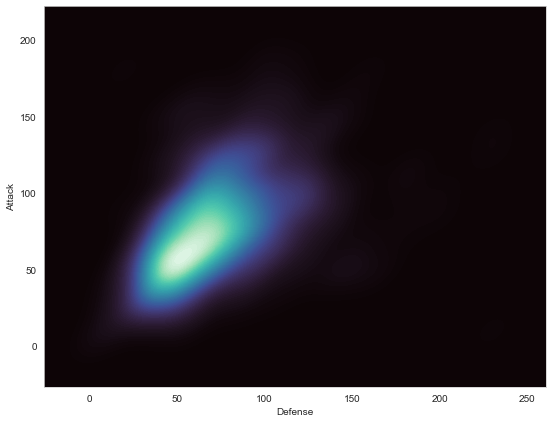

In [16]:
plt.figure(figsize=[9,7])

sns.kdeplot(
    data=df, x="Defense", y="Attack",
    fill=True, thresh=0, levels=100, cmap="mako",
)